# Question 2

# Exercise 9, p. 57: prediction using automobile data. [Book](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)

### Exercise 9
### This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.
1. Which of the predictors are quantitative, and which are qualitative?
2. What is the range of each quantitative predictor? You can answer this using the range() function.
3. What is the mean and standard deviation of each quantitative predictor?
4. Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?
5. Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.
6. Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

# Load the Dataset

In [1]:
df <- read.csv('Auto.csv')

# Top 5 Values in the Dataset

In [2]:
head(df,5)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino


# Understand the Structure of the data.
It will help us observe the different predictors available to us

In [3]:
str(df)

'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


### If we observe the above output then we can notice that we have in Horsepower we have some values as '?' , 4 INTEGER values __(cylinders, weight, year, origin)__ and 3 NUMERICAL values __(mpg, displacement , acceleration)__ and name contains the Name of Cars.

# Check for missing values and Count all the missing values in entire dataframe.

In [4]:
lapply(lapply(df, is.na), table)

$mpg

FALSE 
  397 

$cylinders

FALSE 
  397 

$displacement

FALSE 
  397 

$horsepower

FALSE  TRUE 
  392     5 

$weight

FALSE 
  397 

$acceleration

FALSE 
  397 

$year

FALSE 
  397 

$origin

FALSE 
  397 

$name

FALSE 
  397 


### We can observe from the above output that <i>HorsePower</i> has 5 missing values.

### As we are dealing with Car data therefore we can replace missing values with mean value.

# Replacing missing values in the Horsepower column

In [5]:
df$horsepower[is.na(df$horsepower)] = mean(df$horsepower, na.rm=TRUE)

In [6]:
lapply(lapply(df, is.na), table)

$mpg

FALSE 
  397 

$cylinders

FALSE 
  397 

$displacement

FALSE 
  397 

$horsepower

FALSE 
  397 

$weight

FALSE 
  397 

$acceleration

FALSE 
  397 

$year

FALSE 
  397 

$origin

FALSE 
  397 

$name

FALSE 
  397 


In [7]:
head(df)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


# Shifting `name` column to the at the first

In [8]:
df<-df[,c(9, 1:8)]

In [9]:
head(df)

name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
chevrolet chevelle malibu,18,8,307,130,3504,12.0,70,1
buick skylark 320,15,8,350,165,3693,11.5,70,1
plymouth satellite,18,8,318,150,3436,11.0,70,1
amc rebel sst,16,8,304,150,3433,12.0,70,1
ford torino,17,8,302,140,3449,10.5,70,1
ford galaxie 500,15,8,429,198,4341,10.0,70,1


# Summary of the data

In [10]:
summary(df)

             name          mpg          cylinders      displacement  
 ford pinto    :  6   Min.   : 9.00   Min.   :3.000   Min.   : 68.0  
 amc matador   :  5   1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.0  
 ford maverick :  5   Median :23.00   Median :4.000   Median :146.0  
 toyota corolla:  5   Mean   :23.52   Mean   :5.458   Mean   :193.5  
 amc gremlin   :  4   3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0  
 amc hornet    :  4   Max.   :46.60   Max.   :8.000   Max.   :455.0  
 (Other)       :368                                                  
   horsepower        weight      acceleration        year           origin     
 Min.   : 46.0   Min.   :1613   Min.   : 8.00   Min.   :70.00   Min.   :1.000  
 1st Qu.: 76.0   1st Qu.:2223   1st Qu.:13.80   1st Qu.:73.00   1st Qu.:1.000  
 Median : 95.0   Median :2800   Median :15.50   Median :76.00   Median :1.000  
 Mean   :104.5   Mean   :2970   Mean   :15.56   Mean   :75.99   Mean   :1.574  
 3rd Qu.:125.0   3rd Qu.:3609   3rd Qu.:

# Question 1. Which of the predictors are quantitative, and which are qualitative?

### Answers - The Quantitative and Qualitative predictors are :


In [11]:
str(df)

'data.frame':	397 obs. of  9 variables:
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...


<b>Quantitative : `mpg` , `cylinders` , `displacement` , `horsepower` , `weight` , `acceleration` , `year` , `origin`</b>

<b>Qualitative : `name`</b>

# Question 2. What is the range of each quantitative predictor? You can answer this using the range() function.

<b>Answer - Range canbe defined as the difference between Highest Value and Lowest Value.</b>

<b>We can answer this question using two methods :</b>
    
* 1. Subtracting <i>minimum value</i> from <i>maximum value</i>.
* 2. Calculating range using <i>range()</i> function. 

#### Quantitative : mpg , cylinders , displacement , horsepower , weight , acceleration , year , origin

# mpg - range

In [12]:
print("using range function")
print(range(df$mpg))

range_mpg <- (max(df$mpg) - min(df$mpg))
print('Difference between Maximum and minimum value')
print(range_mpg)

[1] "using range function"
[1]  9.0 46.6
[1] "Difference between Maximum and minimum value"
[1] 37.6


# cylinders - range

In [13]:
print("using range function")
print(range(df$cylinders))

range_cylinders <- (max(df$cylinders) - min(df$cylinders))
print('Difference between Maximum and minimum value')
print(range_cylinders)

[1] "using range function"
[1] 3 8
[1] "Difference between Maximum and minimum value"
[1] 5


# displacement - range

In [14]:
print("using range function")
print(range(df$displacement))

range_displacement <- (max(df$displacement) - min(df$displacement))
print('Difference between Maximum and minimum value')
print(range_displacement)

[1] "using range function"
[1]  68 455
[1] "Difference between Maximum and minimum value"
[1] 387


# horsepower - range

In [15]:
print("using range function")
print(range(df$horsepower))

range_horsepower <- (max(df$horsepower) - min(df$horsepower))
print('Difference between Maximum and minimum value')
print(range_horsepower)

[1] "using range function"
[1]  46 230
[1] "Difference between Maximum and minimum value"
[1] 184


# weight - range

In [16]:
print("using range function")
print(range(df$weight))

range_weight <- (max(df$weight) - min(df$weight))
print('Difference between Maximum and minimum value')
print(range_weight)

[1] "using range function"
[1] 1613 5140
[1] "Difference between Maximum and minimum value"
[1] 3527


# acceleration - range

In [17]:
print("using range function")
print(range(df$acceleration))

range_acceleration <- (max(df$acceleration) - min(df$acceleration))
print('Difference between Maximum and minimum value')
print(range_acceleration)

[1] "using range function"
[1]  8.0 24.8
[1] "Difference between Maximum and minimum value"
[1] 16.8


# year - range

In [18]:
print("using range function")
print(range(df$year))

range_year <- (max(df$year) - min(df$year))
print('Difference between Maximum and minimum value')
print(range_year)

[1] "using range function"
[1] 70 82
[1] "Difference between Maximum and minimum value"
[1] 12


# origin - range

In [19]:
print("using range function")
print(range(df$origin))

range_origin <- (max(df$origin) - min(df$origin))
print('Difference between Maximum and minimum value')
print(range_origin)

[1] "using range function"
[1] 1 3
[1] "Difference between Maximum and minimum value"
[1] 2


# Question 3. What is the mean and standard deviation of each quantitative predictor?

# mpg

In [20]:
print("mean")
print(mean(df$mpg))

print("Standard Deviation")
print(sd(df$mpg))

[1] "mean"
[1] 23.51587
[1] "Standard Deviation"
[1] 7.825804


# cylinders

In [21]:
print("mean")
print(mean(df$cylinders))

print("Standard Deviation")
print(sd(df$cylinders))

[1] "mean"
[1] 5.458438
[1] "Standard Deviation"
[1] 1.701577


# displacement

In [22]:
print("mean")
print(mean(df$displacement))

print("Standard Deviation")
print(sd(df$displacement))

[1] "mean"
[1] 193.5327
[1] "Standard Deviation"
[1] 104.3796


# horsepower

In [23]:
print("mean")
print(mean(df$horsepower))

print("Standard Deviation")
print(sd(df$horsepower))

[1] "mean"
[1] 104.4694
[1] "Standard Deviation"
[1] 38.24739


# weight

In [24]:
print("mean")
print(mean(df$weight))

print("Standard Deviation")
print(sd(df$weight))

[1] "mean"
[1] 2970.262
[1] "Standard Deviation"
[1] 847.9041


# acceleration

In [25]:
print("mean")
print(mean(df$acceleration))

print("Standard Deviation")
print(sd(df$acceleration))

[1] "mean"
[1] 15.55567
[1] "Standard Deviation"
[1] 2.749995


# year

In [26]:
print("mean")
print(mean(df$year))

print("Standard Deviation")
print(sd(df$year))

[1] "mean"
[1] 75.99496
[1] "Standard Deviation"
[1] 3.690005


# Origin

In [27]:
print("mean")
print(mean(df$origin))

print("Standard Deviation")
print(sd(df$origin))

[1] "mean"
[1] 1.574307
[1] "Standard Deviation"
[1] 0.8025495


# Question 4. Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [28]:
new_df <- df[-c(10:85),] 

In [29]:
head(new_df,15)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
1,chevrolet chevelle malibu,18,8,307,130,3504,12.0,70,1
2,buick skylark 320,15,8,350,165,3693,11.5,70,1
3,plymouth satellite,18,8,318,150,3436,11.0,70,1
4,amc rebel sst,16,8,304,150,3433,12.0,70,1
5,ford torino,17,8,302,140,3449,10.5,70,1
6,ford galaxie 500,15,8,429,198,4341,10.0,70,1
7,chevrolet impala,14,8,454,220,4354,9.0,70,1
8,plymouth fury iii,14,8,440,215,4312,8.5,70,1
9,pontiac catalina,14,8,455,225,4425,10.0,70,1
86,buick century 350,13,8,350,175,4100,13.0,73,1


# mpg

In [30]:
print("using range function")
print(range(new_df$mpg))

range_mpg <- (max(new_df$mpg) - min(new_df$mpg))
print('Difference between Maximum and minimum value')
print(range_mpg)

print("mean")
print(mean(new_df$mpg))

print("Standard Deviation")
print(sd(new_df$mpg))

[1] "using range function"
[1] 11.0 46.6
[1] "Difference between Maximum and minimum value"
[1] 35.6
[1] "mean"
[1] 24.43863
[1] "Standard Deviation"
[1] 7.908184


# cylinders

In [31]:
print("using range function")
print(range(new_df$cylinders))

range_cylinders <- (max(new_df$cylinders) - min(new_df$cylinders))
print('Difference between Maximum and minimum value')
print(range_cylinders)

print("mean")
print(mean(new_df$cylinders))

print("Standard Deviation")
print(sd(new_df$cylinders))

[1] "using range function"
[1] 3 8
[1] "Difference between Maximum and minimum value"
[1] 5
[1] "mean"
[1] 5.370717
[1] "Standard Deviation"
[1] 1.653486


# Displacement

In [32]:
print("using range function")
print(range(new_df$displacement))

range_displacement <- (max(new_df$displacement) - min(new_df$displacement))
print('Difference between Maximum and minimum value')
print(range_displacement)

print("mean")
print(mean(new_df$displacement))

print("Standard Deviation")
print(sd(new_df$displacement))

[1] "using range function"
[1]  68 455
[1] "Difference between Maximum and minimum value"
[1] 387
[1] "mean"
[1] 187.0498
[1] "Standard Deviation"
[1] 99.63539


# Horsepower

In [33]:
print("using range function")
print(range(new_df$horsepower))

range_horsepower <- (max(new_df$horsepower) - min(new_df$horsepower))
print('Difference between Maximum and minimum value')
print(range_horsepower)

print("mean")
print(mean(new_df$horsepower))

print("Standard Deviation")
print(sd(new_df$horsepower))

[1] "using range function"
[1]  46 230
[1] "Difference between Maximum and minimum value"
[1] 184
[1] "mean"
[1] 100.9996
[1] "Standard Deviation"
[1] 35.67265


# Weight

In [34]:
print("using range function")
print(range(new_df$weight))

range_weight <- (max(new_df$weight) - min(new_df$weight))
print('Difference between Maximum and minimum value')
print(range_weight)

print("mean")
print(mean(new_df$weight))

print("Standard Deviation")
print(sd(new_df$weight))

[1] "using range function"
[1] 1649 4997
[1] "Difference between Maximum and minimum value"
[1] 3348
[1] "mean"
[1] 2933.963
[1] "Standard Deviation"
[1] 810.6429


# Acceleration

In [35]:
print("using range function")
print(range(new_df$year))

range_acceleration <- (max(new_df$acceleration) - min(new_df$acceleration))
print('Difference between Maximum and minimum value')
print(range_acceleration)

print("mean")
print(mean(new_df$acceleration))

print("Standard Deviation")
print(sd(new_df$acceleration))

[1] "using range function"
[1] 70 82
[1] "Difference between Maximum and minimum value"
[1] 16.3
[1] "mean"
[1] 15.72305
[1] "Standard Deviation"
[1] 2.680514


# Year

In [36]:
print("using range function")
print(range(new_df$year))

range_year <- (max(new_df$year) - min(new_df$year))
print('Difference between Maximum and minimum value')
print(range_year)

print("mean")
print(mean(new_df$year))

print("Standard Deviation")
print(sd(new_df$year))

[1] "using range function"
[1] 70 82
[1] "Difference between Maximum and minimum value"
[1] 12
[1] "mean"
[1] 77.15265
[1] "Standard Deviation"
[1] 3.11123


# Origin

In [37]:
print("using range function")
print(range(new_df$origin))

range_origin <- (max(new_df$origin) - min(new_df$origin))
print('Difference between Maximum and minimum value')
print(range_origin)

print("mean")
print(mean(new_df$origin))

print("Standard Deviation")
print(sd(new_df$origin))

[1] "using range function"
[1] 1 3
[1] "Difference between Maximum and minimum value"
[1] 2
[1] "mean"
[1] 1.598131
[1] "Standard Deviation"
[1] 0.8161627


# Question 5. Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

# Answer
### To Observe all our variables together, Let's add a **id** column to our dataset. 
### We will try to visualize all our variables together and then we can visualize them separately based on the trends we observe.

In [38]:
df$id <- seq.int(nrow(df))

In [39]:
head(df)

name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,id
chevrolet chevelle malibu,18,8,307,130,3504,12.0,70,1,1
buick skylark 320,15,8,350,165,3693,11.5,70,1,2
plymouth satellite,18,8,318,150,3436,11.0,70,1,3
amc rebel sst,16,8,304,150,3433,12.0,70,1,4
ford torino,17,8,302,140,3449,10.5,70,1,5
ford galaxie 500,15,8,429,198,4341,10.0,70,1,6


# Let's observe the relationship of mpg with other variables.

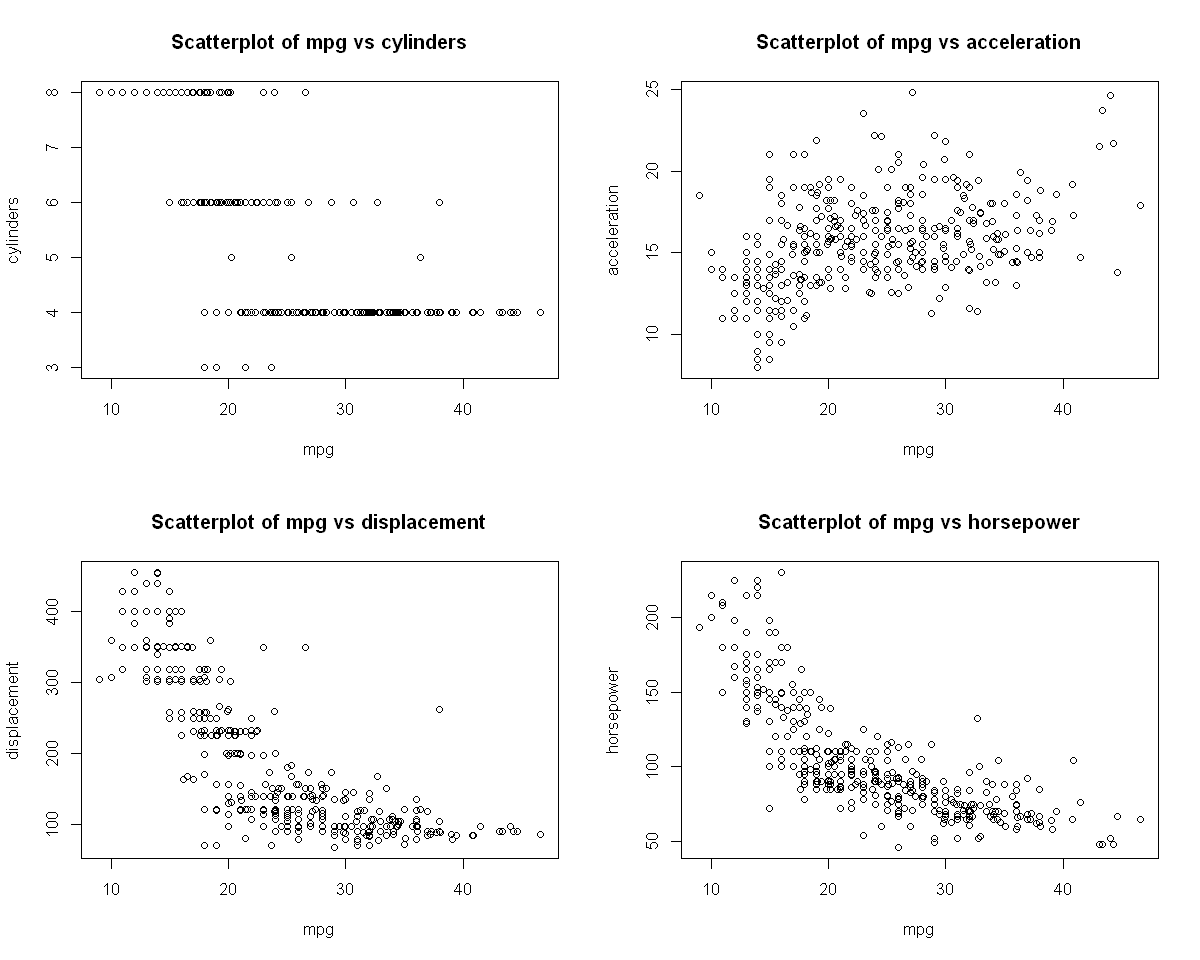

In [40]:
options(repr.plot.width = 10, repr.plot.height = 8)
df1 <- df #to avoid warnings
attach(df1) #To use variables of this dataset
par(mfrow=c(2,2)) #Creating 2 rows and 2 columns
plot(x=mpg , y=cylinders, main="Scatterplot of mpg vs cylinders")
plot(x=mpg , y=acceleration, main="Scatterplot of mpg vs acceleration")
plot(x=mpg , y=displacement, main="Scatterplot of mpg vs displacement")
plot(x=mpg , y=horsepower, main="Scatterplot of mpg vs horsepower")

Now if we observe the above graph we can see that:
* **mpg vs cylinders** has **no correlation** with each other.
* **mpg vs acceleration** has a **weak positive correlation**.
* **mpg vs displacement** and **mpg vs horsepower** has a **Strong Negative Correlation**.

# Let's observe the Relationship of horsepower against other variables

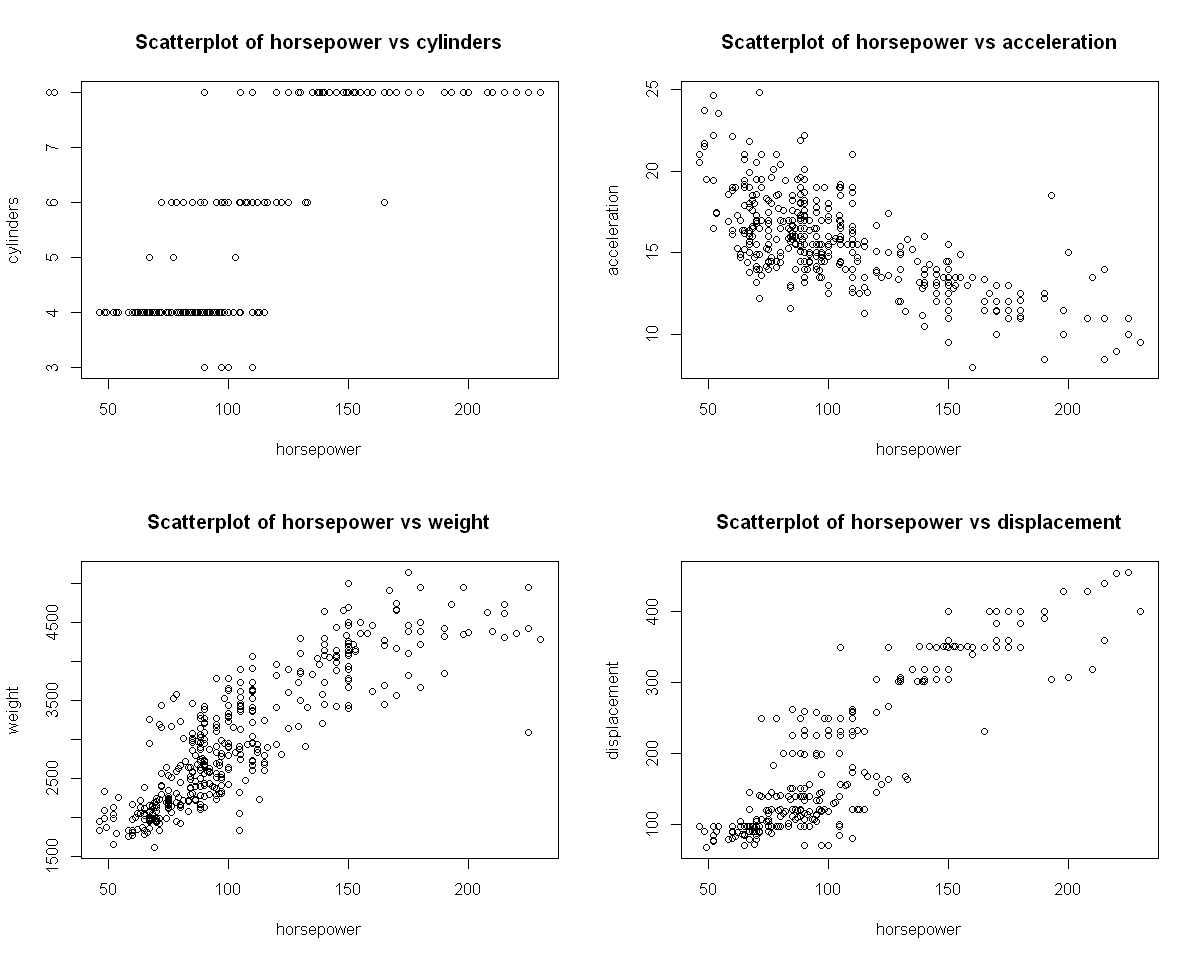

In [41]:
options(repr.plot.width = 10, repr.plot.height = 8)
detach(df1)  #To avoid the warnings occurring because of the masked objects
df2 <- df #to avoid warnings
attach(df2) #To use variables of this dataset
par(mfrow=c(2,2)) #Creating 2 rows and 2 columns
plot(x=horsepower , y=cylinders, main="Scatterplot of horsepower vs cylinders")
plot(x=horsepower , y=acceleration, main="Scatterplot of horsepower vs acceleration")
plot(x=horsepower , y=weight, main="Scatterplot of horsepower vs weight")
plot(x=horsepower , y=displacement, main="Scatterplot of horsepower vs displacement")

Now if we observe the above graph we can see that:
* **Horsepower vs cylinders** has **no correlation** with each other.
* **Horsepower vs acceleration** has a **Low Negative correlation**.
* **Horsepower vs weight** has a **Strong Positive Correlation**.
* **Horsepower vs displacement** has a **Positive Corelation** 

# Let's plot cylinders to find out number of cylinders present in cars

### This will tell Number of cylinders present in most of the cars

In [47]:
# Calling tidyverse library and suppressing warings coz we are using jupyter notebook

suppressWarnings({library(tidyverse)})

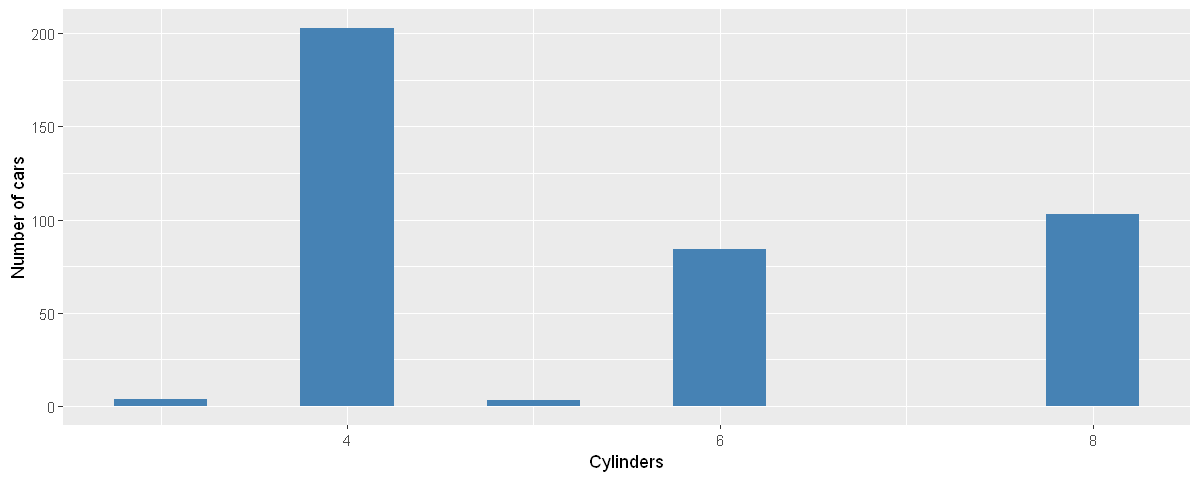

In [43]:
options(repr.plot.width = 10, repr.plot.height = 4) # Setting R environment for Plot height, width and resolution
p1 <- ggplot(df, aes(x = cylinders)) +
      geom_bar(fill="steelblue", width = 0.50) +
      labs(x="Cylinders",y="Number of cars")

p1

# Let's plot cylinders and Horsepower to see if there's any intresting relationship

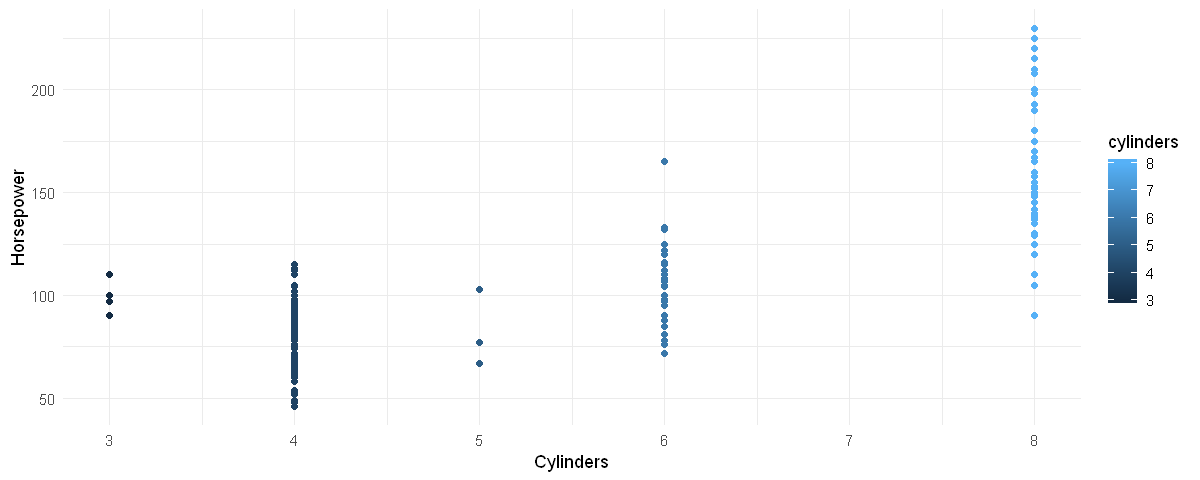

In [44]:
options(repr.plot.width = 10, repr.plot.height = 4)
ggplot(df1,aes(x=cylinders,y=horsepower, group=cylinders))+
labs(x="Cylinders",y="Horsepower") +
geom_point(aes(color=cylinders)) +
theme_minimal()

### Now if we closely observe the above graph, we can notice that the more the number of cylinders present in the car, the more horsepower the car can generate. We can say horsepower is somewhat dependent on the number of cylinders present in the car.

# Question 6. Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

The following object is masked from package:ggplot2:

    mpg



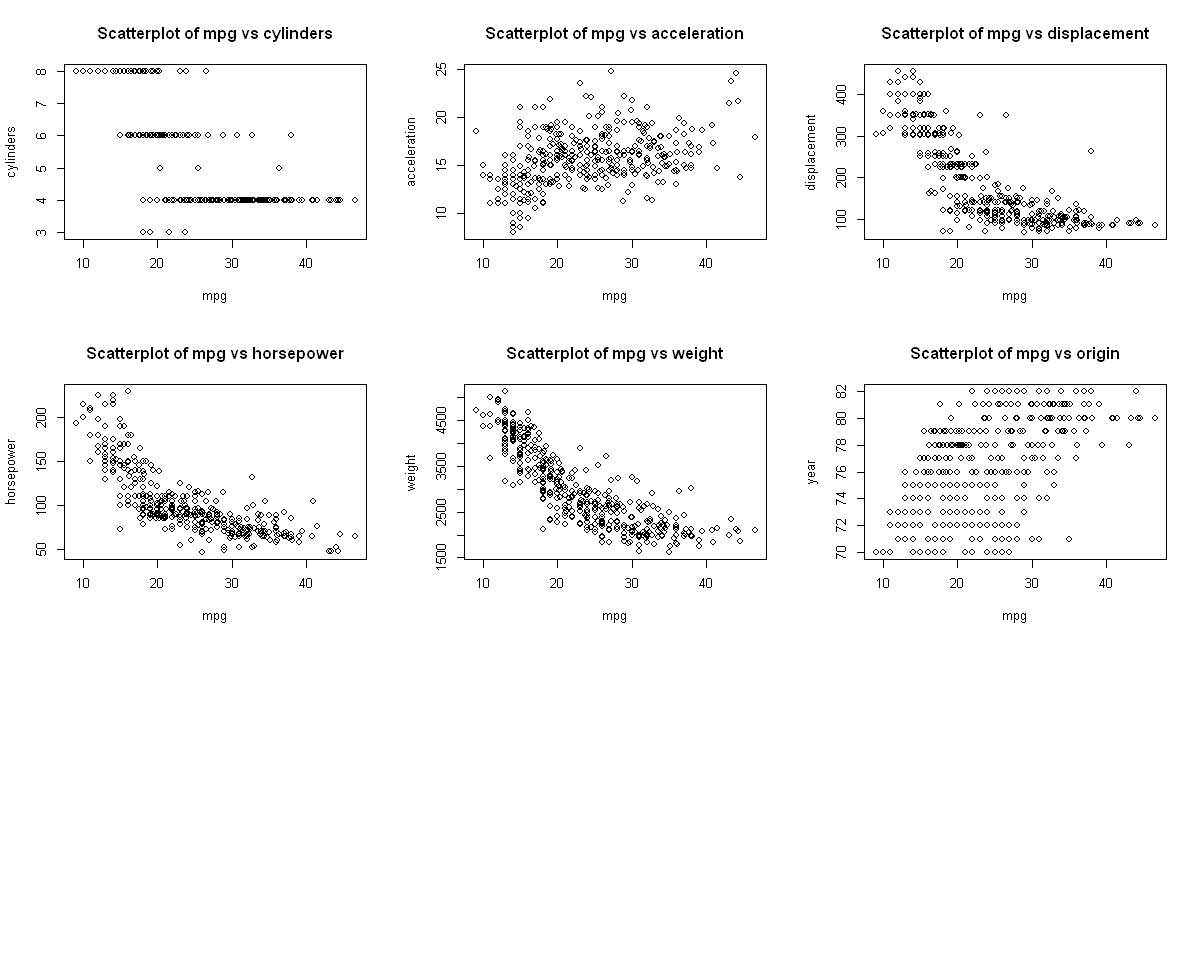

In [45]:
options(repr.plot.width = 10, repr.plot.height = 8)
df3 <- df #to avoid warnings
#detach(df1)
detach(df2)
attach(df3) #To use variables of this dataset
par(mfrow=c(3,3)) #Creating 2 rows and 2 columns
plot(x=mpg , y=cylinders, main="Scatterplot of mpg vs cylinders")
plot(x=mpg , y=acceleration, main="Scatterplot of mpg vs acceleration")
plot(x=mpg , y=displacement, main="Scatterplot of mpg vs displacement")
plot(x=mpg , y=horsepower, main="Scatterplot of mpg vs horsepower")
plot(x=mpg , y=weight, main="Scatterplot of mpg vs weight")
plot(x=mpg , y=year, main="Scatterplot of mpg vs origin")

# So on the basis of above Scatter Plots, we can make few observations 
### <i>mpg(Gas mileage)</i> has <i>Strong Negative Correlation</i> with <i>Displacement, Horsepower and Weight</i> which basically means <i>mpg</i> tends to move in oppossite direction based on the values of <i>Displacement, Horsepower and Weight</i>.

### Hence, we can use these variables <i>Displacement, Horsepower and Weight</i> to predict the values of <i>mpg</i>.

### <i>mpg</i> also has low positive correlation with acceleration which might not be so useful in predicting the values of <i>mpg</i>.

# **We can also test our above assumptions using a correlation function and directly calculating a value for it.**

In [46]:
cor(df[2:9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7762599,-0.8044430,-0.7714414,-0.8317389,0.4222974,0.5814695,0.5636979
cylinders,-0.7762599,1.0000000,0.9509199,0.8397152,0.8970169,-0.5040606,-0.3467172,-0.5649716
displacement,-0.8044430,0.9509199,1.0000000,0.8938331,0.9331044,-0.5441618,-0.3698041,-0.6106643
horsepower,-0.7714414,0.8397152,0.8938331,1.0000000,0.8605806,-0.6870393,-0.4130218,-0.4539618
weight,-0.8317389,0.8970169,0.9331044,0.8605806,1.0000000,-0.4195023,-0.3079004,-0.5812652
acceleration,0.4222974,-0.5040606,-0.5441618,-0.6870393,-0.4195023,1.0000000,0.2829009,0.2100836
year,0.5814695,-0.3467172,-0.3698041,-0.4130218,-0.3079004,0.2829009,1.0000000,0.1843141
origin,0.5636979,-0.5649716,-0.6106643,-0.4539618,-0.5812652,0.2100836,0.1843141,1.0000000


# After observing the values closely, we can make few assumptions.

### 1. mpg is slightly correlated with acceleration. We choose to ignore relation with year and origin as we are more focussed on the features which will actually play a role in Car/Auto performance. <i>mpg</i> has Strong Negative Correlation with <i>displacement, horsepower, weight</i>.

### The values of mpg against displacement, mpg against horsepower and mpg against weight are -0.804430, -0.7714414 and -0.8317389 which itself explains the Strong Negative Correlation which we are observing in the plots. Hence, we can use these variables to predict MPG.